# 图像处理

# 1.形态学-腐蚀操作

## 1.1汉字腐蚀(例) 

In [1]:
import cv2 # opencv的缩写为cv2
import matplotlib.pyplot as plt # matplotlib库用于绘图展示
import numpy as np   # numpy数值计算工具包

# 魔法指令，直接展示图，Jupyter notebook特有
%matplotlib inline  

In [2]:
# 腐蚀操作通常是拿二值图像做腐蚀操作
img = cv2.imread('dige.png')

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
# 只要框里有黑色，中心点的值就变为黑色，即原来的白色被黑色腐蚀掉

kernel = np.ones((3,3),np.uint8) # 生成3x3的核
erosion = cv2.erode(img,kernel,iterations = 1) # 腐蚀1次

cv2.imshow('erosion', erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 1.2圆形腐蚀(例) 

In [4]:
pie = cv2.imread('pie.png')

cv2.imshow('pie', pie)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
kernel = np.ones((30,30),np.uint8) 
erosion_1 = cv2.erode(pie,kernel,iterations = 1) # 腐蚀1次
erosion_2 = cv2.erode(pie,kernel,iterations = 2) # 腐蚀2次
erosion_3 = cv2.erode(pie,kernel,iterations = 3) # 腐蚀3次
res = np.hstack((erosion_1,erosion_2,erosion_3))
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 2.形态学-膨胀操作

## 2.1汉字膨胀(例子) 

In [6]:
img = cv2.imread('dige.png')
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
# 先腐蚀 
kernel = np.ones((3,3),np.uint8) 
dige_erosion = cv2.erode(img,kernel,iterations = 1)
cv2.imshow('erosion', erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# 后膨胀，抵消腐蚀造成的损害
kernel = np.ones((3,3),np.uint8) 
dige_dilate = cv2.dilate(dige_erosion,kernel,iterations = 1)

cv2.imshow('dilate', dige_dilate)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 2.2圆形膨胀(例) 

In [9]:
pie = cv2.imread('pie.png')

kernel = np.ones((30,30),np.uint8) 
dilate_1 = cv2.dilate(pie,kernel,iterations = 1) # 膨胀1次
dilate_2 = cv2.dilate(pie,kernel,iterations = 2) # 膨胀2次
dilate_3 = cv2.dilate(pie,kernel,iterations = 3) # 膨胀3次
res = np.hstack((dilate_1,dilate_2,dilate_3))
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 3.开运算与闭运算

In [10]:
# 开：先腐蚀，再膨胀
img = cv2.imread('dige.png')

kernel = np.ones((5,5),np.uint8) 
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

cv2.imshow('opening', opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
# 闭：先膨胀，再腐蚀
img = cv2.imread('dige.png')

kernel = np.ones((5,5),np.uint8) 
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

cv2.imshow('closing', closing)
cv2.waitKey(0)
cv2.destroyAllWindows()



# 4.梯度运算

In [12]:
# 梯度=膨胀-腐蚀
pie = cv2.imread('pie.png')
kernel = np.ones((7,7),np.uint8) 
dilate = cv2.dilate(pie,kernel,iterations = 5)
erosion = cv2.erode(pie,kernel,iterations = 5)

res = np.hstack((dilate,erosion))

cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
# 梯度=膨胀-腐蚀 一步操作
gradient = cv2.morphologyEx(pie, cv2.MORPH_GRADIENT, kernel)

cv2.imshow('gradient', gradient)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 5.礼帽与黑帽
- 礼帽 = 原始输入-开运算结果
- 黑帽 = 闭运算-原始输入

In [14]:
# 礼帽
# 原始带刺，开运算不带刺，原始输入-开运算 = 刺
img = cv2.imread('dige.png')
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
cv2.imshow('tophat', tophat)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
# 黑帽
# 原始带刺，闭运算带刺并且比原始边界胖一点，闭运算-原始输入 = 轮廓
img = cv2.imread('dige.png')
blackhat  = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT, kernel)
cv2.imshow('blackhat ', blackhat )
cv2.waitKey(0)
cv2.destroyAllWindows()

# 6.Sobel算子、Scharr算子与Laplacian算子

## 6.1图像梯度-Sobel算子

① Sobel算子函数：cv2.Sobel(src, ddepth, dx, dy, ksize)，返回值为Sobel算子处理后的图像。

 - ddepth：图像的深度
 - dx 和 dy 分别表示水平和竖直方向
 - ksize 是 Sobel 算子的大小
 
② 靠近最近点的左右和上下的权重最高，所以为±2。

![title](sobel_1.png)

### 圆形处理(例) 

In [16]:
img = cv2.imread('pie.png',cv2.IMREAD_GRAYSCALE)
cv2.imshow("img",img)
cv2.waitKey()
cv2.destroyAllWindows()

In [17]:
def cv_show(img,name):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()

In [18]:
# 梯度就是边界点，左边右边不一样

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3) # 1,0 表示是否计算x,y方向梯度

cv_show(sobelx,'sobelx')

In [19]:
# 白到黑是正数，黑到白就是负数了，所有的负数会被截断成0，所以要取绝对值
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3) # 取水平方向，即x方向
sobelx = cv2.convertScaleAbs(sobelx) # 取负数时，取绝对值
cv_show(sobelx,'sobelx')

In [20]:
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3) # 取竖直方向，即y方向
sobely = cv2.convertScaleAbs(sobely) # 取负数时，取绝对值
cv_show(sobely,'sobely')

In [21]:
# 分别计算x和y，再求和
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
cv_show(sobelxy,'sobelxy')

In [22]:
# 不建议直接计算,还有重影
sobelxy=cv2.Sobel(img,cv2.CV_64F,1,1,ksize=3)
sobelxy = cv2.convertScaleAbs(sobelxy) 
cv_show(sobelxy,'sobelxy')

### 人照处理(例)

In [23]:
img = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)
cv_show(img,'img')

In [24]:
# 分别计算x和y，再求和
img = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
cv_show(sobelxy,'sobelxy')

In [25]:
# 整体计算有重影和模糊，不建议整体计算
img = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)

sobelxy=cv2.Sobel(img,cv2.CV_64F,1,1,ksize=3)
sobelxy = cv2.convertScaleAbs(sobelxy) 
cv_show(sobelxy,'sobelxy')

## 6.2图像梯度-Scharr算子
① 对结果的差异更敏感一些。

![title](scharr.png)

## 6.3图像梯度-laplacian算子
① Laplacian算子用的是二阶导，对噪音点更敏感一些。

② 如果中心点是边界，它与周围像素点差异的幅度会较大，Laplacian算子根据此特点可以把边界识别出来。

![title](l.png)

## 6.4各个算子区别 

In [26]:
#不同算子的差异
img = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)
# Sobel算子
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)   
sobely = cv2.convertScaleAbs(sobely)  
sobelxy =  cv2.addWeighted(sobelx,0.5,sobely,0.5,0)  
# Scharr算子
scharrx = cv2.Scharr(img,cv2.CV_64F,1,0)
scharry = cv2.Scharr(img,cv2.CV_64F,0,1)
scharrx = cv2.convertScaleAbs(scharrx)   
scharry = cv2.convertScaleAbs(scharry)  
scharrxy =  cv2.addWeighted(scharrx,0.5,scharry,0.5,0) 
# Laplacian算子
laplacian = cv2.Laplacian(img,cv2.CV_64F) # 没有 x、y，因为是求周围点的比较
laplacian = cv2.convertScaleAbs(laplacian)   

res = np.hstack((sobelxy,scharrxy,laplacian))
cv_show(res,'res')

# 7.图像平衡处理

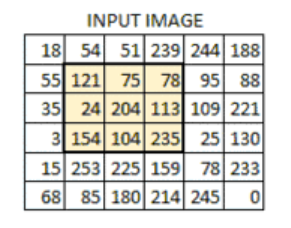

In [27]:
img = cv2.imread('lenaNoise.png')

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 7.1均值滤波 

In [28]:
# 均值滤波
# 简单的平均卷积操作，方框中的值相加，取平均，替换掉中心204的值

blur = cv2.blur(img,(3,3)) # (3,3) 为核的大小，通常情况核都是奇数 3、5、7
cv2.imshow('blur',blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 7.2方框滤波 

In [29]:
# 方框滤波
# 基本和均值一样，可以选择归一化

# 在 Python 中 -1 表示自适应填充对应的值，这里的 -1 表示与颜色通道数自适应一样
box = cv2.boxFilter(img,-1,(3,3),normalize=True)  # 方框滤波如果做归一化，得到的结果和均值滤波一模一样
cv2.imshow('box',box)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
# 方框滤波
# 基本和均值一样，可以选择归一化，容易越界

box = cv2.boxFilter(img,-1,(3,3),normalize=False)  # 越界的值取 255
cv2.imshow('box',box)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 7.3高斯滤波 

In [31]:
# 高斯函数，越接近均值时，它的概率越大。
# 离中心值越近的，它的权重越大，离中心值越远的，它的权重越小。

aussian = cv2.GaussianBlur(img,(5,5),1)
cv2.imshow('aussian',aussian)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 7.4中值滤波 

In [32]:
# 中值滤波
# 排序后拿中值替代中间元素值的大小

median = cv2.medianBlur(img,5)
cv2.imshow('median',median)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 7.5显示所有滤波

In [33]:
# 展示所有滤波

res = np.hstack((blur,aussian,median)) # 矩阵横着拼接
#res = np.vstack((blur,aussian,median)) # 矩阵竖着拼接
cv2.imshow('median vs average', res)      
cv2.waitKey(0)
cv2.destroyAllWindows()

# 8.图像阈值

## 8.1图像阈值 

① ret, dst = cv2.threshold(src, thresh, maxval, type)

- src： 输入图，只能输入单通道图像，通常来说为灰度图
- thresh： 阈值
- dst： 输出图
- ret： 阈值
- maxval： 当像素值超过了阈值 ( 或者小于阈值，根据 type 来决定 )，所赋予的值
- type：二值化操作的类型，包含以下5种类型： 
- cv2.THRESH_BINARY           超过阈值部分取maxval ( 最大值 )，否则取0
- cv2.THRESH_BINARY_INV    THRESH_BINARY的反转
- cv2.THRESH_TRUNC            大于阈值部分设为阈值，否则不变
- cv2.THRESH_TOZERO          大于阈值部分不改变，否则设为0
- cv2.THRESH_TOZERO_INV  THRESH_TOZERO的反转

127.0
127.0
127.0
127.0
127.0


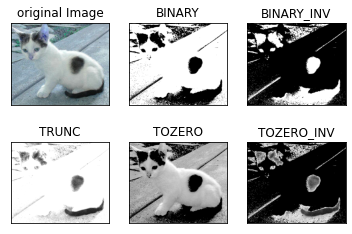

In [34]:
img = cv2.imread('cat.jpg',cv2.IMREAD_COLOR)  
img_gray = cv2.imread('cat.jpg',cv2.IMREAD_GRAYSCALE)    
ret, thresh1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)    
print(ret)
ret, thresh2 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV) # THRESH_BINARY_INV 相对 THRESH_BINARY 黑的变成白的，白的变成黑的       
print(ret)
ret, thresh3 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC)     
print(ret)
ret, thresh4 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO)
print(ret)
ret, thresh5 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV)
print(ret)

titles = ['original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']        
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]  

for i in range(6):
    plt.subplot(2,3,i+1), plt.imshow(images[i],'gray')  
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# 9.Canny边缘检测
- 1)        使用高斯滤波器，以平滑图像，滤除噪声。

- 2)        计算图像中每个像素点的梯度强度和方向。

- 3)        应用非极大值（Non-Maximum Suppression）抑制，以消除边缘检测带来的杂散响应。

- 4)        应用双阈值（Double-Threshold）检测来确定真实的和潜在的边缘。

- 5)        通过抑制孤立的弱边缘最终完成边缘检测。

## 9.1高斯滤波器
① 高斯滤波器靠近的中心点的权重比较大，较远中心点的权重比较小。

![title](canny_1.png)

## 9.2梯度和方向

![title](canny_2.png)

## 9.3非极大值抑制

① C 点的梯度和方向可以通过前一步算出来。

② C 点的梯度是不是一个极大值点，应该是去跟它的临近点去比较。

③ 利用 C 点梯度的方向，可以得到上面有一个交点 Q，下面有一个交点 Z，如果 C 点的梯度比 Q 和 Z 都大，那么 C 就是极大值点，其中 Q 和 Z 的梯度值通过线性差值法来计算。

④ 如果 C 的梯度是极大值点，那么 C 就是边缘点。否则 C 不是极大值点，就会被抑制。

![title](canny_3.png)

① 简单计算将像素点周围固定为八个像素，当梯度角度相交的点与哪个方向近，就哪个方向的两个点。

② 例如，梯度方向是 43° 就取上下两个像素来做极大值判断，如果梯度方向是 46°，就取左下、右上两个像素来做极大值判断。

③ 如下图所示，如果 A 的梯度值比 B 和 C 都要大，那么 A 就是边界，由于边界与梯度方向垂直，所以如下图所示黑色为边界。

![title](canny_6.png)

## 9.4双阈值检测

① C 在 minVal 与 maxVal 之间，是候选边界，若 C 的左右或上下两边连有 A，而 A 是边界，那么定义 C 也是边界。

② B 在 minVal 与 maxVal 之间，是候选边界，若B的左右或上下像素都不是边界，那么 B 就被舍弃，不定义为边界。

![title](canny_5.png)

## 9.5Canny代码 

In [35]:
img=cv2.imread("lena.jpg",cv2.IMREAD_GRAYSCALE)

v1=cv2.Canny(img,80,150) # 第二个参数为minVal，第三个参数为maxVal
v2=cv2.Canny(img,50,100)

res = np.hstack((v1,v2))
cv_show(res,'res')


In [36]:
img=cv2.imread("car.png",cv2.IMREAD_GRAYSCALE)

v1=cv2.Canny(img,120,250) # 第二个参数为minVal，第三个参数为maxVal
v2=cv2.Canny(img,50,100)

res = np.hstack((v1,v2))
cv_show(res,'res')

# 10.图像轮廓

## 10.1图像轮廓简介 

① 边缘有一些零零散散的线段也可以当做边缘，反正梯度上下左右发生差异，就把它当做边缘了。

② 图像的轮廓必须是一个整体，不是零零散散的，而是连在一块的。

③ 图像轮廓函数：cv2.findContours(img,mode,method)
#### cv2.findContours(img,mode,method)
mode:轮廓检索模式
- RETR_EXTERNAL ：只检索最外面的轮廓；
- RETR_LIST：检索所有的轮廓，并将其保存到一条链表当中；
- RETR_CCOMP：检索所有的轮廓，并将他们组织为两层：顶层是各部分的外部边界，第二层是空洞的边界;
- RETR_TREE：检索所有的轮廓，并重构嵌套轮廓的整个层次;

method:轮廓逼近方法
- CHAIN_APPROX_NONE：以Freeman链码的方式输出轮廓，所有其他方法输出多边形（顶点的序列）。
- CHAIN_APPROX_SIMPLE:压缩水平的、垂直的和斜的部分，也就是，函数只保留他们的终点部分。

![title](chain.png)

## 10.2绘制轮廓 

### 为了更高的准确率，使用二值图像。

In [45]:
img = cv2.imread('contours.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) # 大于 17 的取 255，小于 127 的取 0       
cv_show(thresh,'thresh')

In [46]:
# 做完二值后，再用图像轮廓检测函数再去做
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print(np.array(contours).shape) # 轮廓点的信息
print(hierarchy) # hierarchy 是把轮廓结果保存在层级结构当中，暂时用不上

(11,)
[[[ 2 -1  1 -1]
  [-1 -1 -1  0]
  [ 4  0  3 -1]
  [-1 -1 -1  2]
  [ 6  2  5 -1]
  [-1 -1 -1  4]
  [ 8  4  7 -1]
  [-1 -1 -1  6]
  [-1  6  9 -1]
  [10 -1 -1  8]
  [-1  9 -1  8]]]


D:\pytorch\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


### 绘制轮廓

In [47]:
cv_show(img,'img')

In [48]:
# 传入绘制图像，轮廓，轮廓索引，颜色模式，线条厚度
# 注意需要copy,要不原图会变。。。
# 若不用拷贝后的，而是用原图画轮廓，则画轮廓图绘把原始的输入图像重写，覆盖掉 
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, -1, (0, 0, 255), 2)
cv_show(res,'res')

In [49]:
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, 0, (0, 0, 255), 2)
cv_show(res,'res')

### 轮廓特征

In [50]:
cnt = contours[0] # 通过轮廓索引，拿到该索引对应的轮廓特征

In [51]:
# 面积
cv2.contourArea(cnt)

8500.5

In [52]:
# 周长，True表示闭合的
cv2.arcLength(cnt,True)

437.9482651948929

## 10.3轮廓近似
① 正常轮廓展示是最右边的图，但是当我们需要轮廓没有那么不规则，而是想要轮廓近似成规则的形状，这就叫轮廓近似，近似成下图中中间图像的轮廓。

② 一条呈抛物线的曲线的端点为 A、B 两点，取曲线上到直线 AB 距离最大的点，该点为 C 点，若 C 点到直线的距离小于设置的阈值，则可以把直线 AB 当做曲线的近似，若 C 点到直线的距离大于设置的阈值，那么曲线不能用直线 AB 来近似，而 AC 曲线可能用 AC 直线来代替、BC曲线可能用 BC 直线来代替。再通过阈值来判断是否可以代替

![title](contours3.png)

### 正常轮廓展示 

In [53]:
img = cv2.imread('contours2.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

draw_img = img.copy()
res = cv2.drawContours(draw_img, [cnt], -1, (0, 0, 255), 2)
cv_show(res,'res')

### 轮廓近似展示

In [54]:
epsilon = 0.15*cv2.arcLength(cnt,True) # 周长的百分比，这里用 0.15 的周长作阈值
approx = cv2.approxPolyDP(cnt,epsilon,True) # 第二个参数为阈值

draw_img = img.copy()
res = cv2.drawContours(draw_img, [approx], -1, (0, 0, 255), 2)
cv_show(res,'res')

## 10.4边界矩形

In [55]:
img = cv2.imread('contours.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

x,y,w,h = cv2.boundingRect(cnt) # 可以得到矩形四个坐标点的相关信息
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
cv_show(img,'img')

In [56]:
area = cv2.contourArea(cnt)
x, y, w, h = cv2.boundingRect(cnt)
rect_area = w * h
extent = float(area) / rect_area
print ('轮廓面积与边界矩形比',extent)

轮廓面积与边界矩形比 0.5154317244724715


## 10.5外接圆

In [57]:
(x,y),radius = cv2.minEnclosingCircle(cnt) 
center = (int(x),int(y)) 
radius = int(radius) 
img = cv2.circle(img,center,radius,(0,255,0),2)
cv_show(img,'img')

# 11.模板匹配

## 11.1模板匹配简介

① 模板匹配和卷积原理很像，模板在原图像上从原点开始滑动，计算模板与（图像被模板覆盖的地方）的差别程度(例如值127与值190的区别)，这个差别程度的计算方法在opencv里有6种，然后将每次计算的结果放入一个矩阵里，作为结果输出。

② 假如原图形是AxB大小，而模板是axb大小，则输出结果的矩阵是(A-a+1)x(B-b+1)。

③ 模板匹配计算方式6种方式 ( 用归一化后的方式更好一些 )：

- TM_SQDIFF：计算平方不同，计算出来的值越小，越相关。        
- TM_CCORR：计算相关性，计算出来的值越大，越相关。
- TM_CCOEFF：计算相关系数，计算出来的值越大，越相关。
- TM_SQDIFF_NORMED：计算归一化平方不同，计算出来的值越接近0，越相关。
- TM_CCORR_NORMED：计算归一化相关性，计算出来的值越接近1，越相关。
- TM_CCOEFF_NORMED：计算归一化相关系数，计算出来的值越接近1，越相关。

④ 公式：https://docs.opencv.org/3.3.1/df/dfb/group__imgproc__object.html#ga3a7850640f1fe1f58fe91a2d7583695d

## 11.2模板匹配单个对象

In [58]:
template = cv2.imread('Face.jpg',0)  # 0 表示以灰度图方式读取
img = cv2.imread('Lena.jpg',0) 
h, w = template.shape[:2] # 获得模板的宽和高
print(img.shape)
print(template.shape)

(263, 263)
(110, 85)


In [59]:
methods = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR',
          'cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']
res = cv2.matchTemplate(img, template, cv2.TM_SQDIFF)
print(res.shape) # 返回的矩阵大小 (A-a+1)x(B-b+1)
min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res) # 返回模板匹配后最小值、最大值的位置   
print(min_val) # cv2.TM_SQDIFF方法中，越小的值表示像素点的差异越小
print(max_val)
print(min_loc) # 当获得最小值对应的模板左上角的位置，加上模板自身的长、宽，可以在原图像中画出最匹配的区域
print(max_loc)

(154, 179)
39168.0
74403584.0
(107, 89)
(159, 62)


4


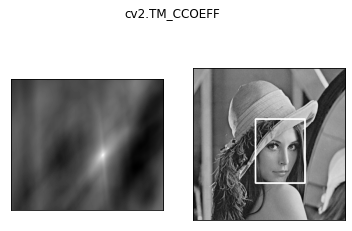

5


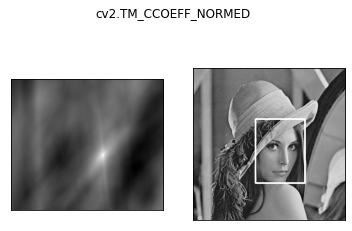

2


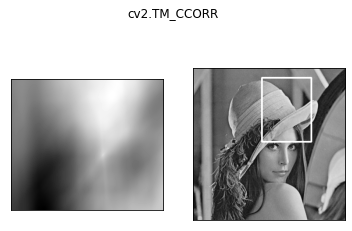

3


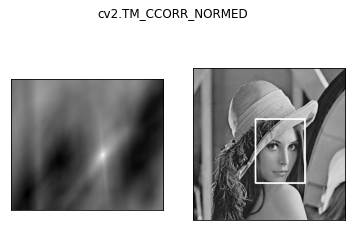

0


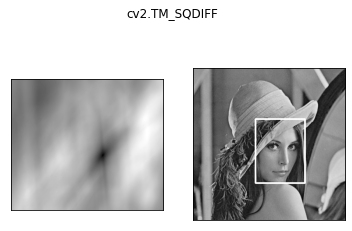

1


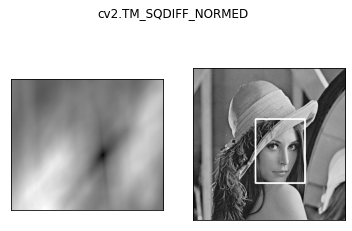

In [60]:
for meth in methods:
    img2 = img.copy()
    # 匹配方法的真值
    method = eval(meth) # 提取字符串中的内容，不能用字符串的形式
    print(method)
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # 如果是平方差匹配 TM_SQDIFF 或归一化平方差匹配 TM_SQDIFF_NORMED,取最小值
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0]+w,top_left[1]+h)
    
    # 画矩形
    cv2.rectangle(img2,top_left,bottom_right,255,2)
    
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.xticks([]), plt.yticks([]) # 隐藏坐标轴
    plt.subplot(122),plt.imshow(img2,cmap='gray')
    plt.xticks([]),plt.yticks([])
    plt.suptitle(meth)
    plt.show()

## 11.3模板匹配多个对象

In [61]:
img_rgb = cv2.imread('Mario.jpg')
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)
print('img_gray.shape：',img_gray.shape)
template = cv2.imread('Mario_coin.jpg',0)
print('template.shape：',template.shape)
h, w = template.shape[:2]

# res 是 result 的简称
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED) # res 是返回每一个小块窗口得到的结果值
print('res.shape：',res.shape)
threshold = 0.8

# 取匹配程度大于 80% 的坐标
loc = np.where(res >= threshold) # np.where 使得返回 res 矩阵中值大于 0.8 的索引，即坐标
print('type(loc):',type(loc)) # loc 为元组类型
print('len(loc):',len(loc))  # loc 元组有两个值
print('len(loc[0]):',len(loc[0]),'len(loc[1]):',len(loc[1]))   # loc 元组每个值 120 个元素
print('type(loc[0]):',type(loc[0]),'type(loc[1]):',type(loc[1])) # loc 元组每个值的类型为 numpy.array 
print("loc[::-1]：",loc[::-1]) # loc[::-1] 表示顺序取反，即第二个 numpy.array 放在第一个 numpy.array 前面     

i = 0
# zip函数为打包为元组的列表，例 a = [1,2,3] b = [4,5,6] zip(a,b) 为 [(1, 4), (2, 5), (3, 6)]    
for pt in zip(*loc[::-1]): # 当用 *b 作为传入参数时, b 可以为列表、元组、集合，zip使得元组中两个 numpy.array 进行配对   
    bottom_right = (pt[0] + w, pt[1] + h)
    cv2.rectangle(img_rgb, pt, bottom_right, (0,0,255),2)
    i = i + 1
print('i:',i)

cv2.imshow('img_rgb',img_rgb)
cv2.waitKey(0)

img_gray.shape： (207, 225)
template.shape： (27, 16)
res.shape： (181, 210)
type(loc): <class 'tuple'>
len(loc): 2
len(loc[0]): 120 len(loc[1]): 120
type(loc[0]): <class 'numpy.ndarray'> type(loc[1]): <class 'numpy.ndarray'>
loc[::-1]： (array([ 69,  70,  83,  84,  97,  98, 111, 112, 125, 126,  68,  69,  70,
        82,  83,  84,  96,  97,  98, 110, 111, 112, 124, 125, 126,  68,
        69,  70,  82,  83,  84,  96,  97,  98, 110, 111, 112, 125, 126,
        69,  83,  97, 111, 125,  54,  55,  69,  83,  84,  97,  98, 111,
       112, 125, 126, 139, 140,  54,  55,  56,  68,  69,  70,  82,  83,
        84,  96,  97,  98, 110, 111, 112, 124, 125, 126, 138, 139, 140,
        54,  55,  56,  68,  69,  70,  82,  83,  84,  96,  97,  98, 110,
       111, 112, 124, 125, 126, 139, 140,  55,  69,  83,  97, 111, 125,
       139,  55,  55,  69,  83,  97, 111, 125, 139,  55,  69,  83,  97,
       111, 125, 139], dtype=int64), array([ 40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  41,  41,  41,
        

-1

# 12.图像金字塔

## 12.1图像金字塔简介

① 金字塔的底层是比较大，越往上越小，图像金字塔就是把图像组合成金字塔的形状。

② 图像金字塔可以做图像特征提取，做特征提取时有时可能不光对原始输入做特征提取，可能还会对好几层图像金字塔做特征提取。可能每一层特征提取的结果是不一样的，再把特征提取的结果总结在一起。

③ 常用的两种图像金字塔形式：

- 高斯金字塔
- 拉普拉斯金字塔

![title](Pyramid_1.png)

## 12.2高斯金字塔

### 向下采样方法(缩小)

![title](Pyramid_2.png)

### 向上采样方法(放大)

![title](Pyramid_3.png)

In [62]:
img=cv2.imread("AM.png")
cv_show(img,'img')
print (img.shape)

(442, 340, 3)


In [63]:
img = cv2.imread('AM.png')
up = cv2.pyrUp(img)
cv_show(up,'up')
print(up.shape)

(884, 680, 3)


In [64]:
img = cv2.imread('AM.png')
down = cv2.pyrDown(img)
cv_show(down,'down')
print(down.shape)

(221, 170, 3)


In [65]:
up = cv2.pyrUp(up)  # 上采样之后再上采样
cv_show(up,'up')
print(up.shape)

(1768, 1360, 3)


In [66]:
img = cv2.imread('AM.png')
up = cv2.pyrUp(img)
up_down = cv2.pyrDown(up) # 先上采样再下采样
cv_show(np.hstack((img,up_down)),'up_down')

## 12.3拉普拉斯金字塔
① 拉普拉斯金字塔的每一层图像尺寸不变。

② 拉普拉斯金字塔的每一层操作都是上一层处理后作为输入，该输入减去该输入缩小放大后的图像，获得该层的输出。

![title](Pyramid_4.png)

In [67]:
img = cv2.imread('AM.png')
domn = cv2.pyrDown(img)
down_up = cv2.pyrUp(down)
L_1 = img - down_up
cv_show(L_1,'L_1')
print(L_1.shape)

(442, 340, 3)


# 13.图像直方图

## 13.1图像直方图简介

① 图像直方图是把图像变为灰度图，分成一个一个像素点的值进行统计，如下图左所示。

② 直方图统计函数 cv2.calcHist(images,channels,mask,histSize,ranges)

- images：原图像的图像格式为 uint8 或 ﬂoat32。当传入函数时应该用中括号 [] 括来传入，例如[img]
- channels：同样用中括号来传入，它会告诉函数统幅的哪幅灰度图的直方图。如果传入的图像是灰度图它的值就是 [0]，如果是彩色图像，那么传入的参数可以是 [0]、[1]、[2]，它们分别对应着 B、G、R 通道，每个通道的图像都是灰度图。 
- mask：掩模图像。统计整幅图像的直方图时就把它设为 None。但是如果你想统计图像的某一部分区域的直方图的，你就制作一个掩模图像并使用它。
- histSize：BIN 的数目。也应用中括号括来。
- ranges: 统计的像素值范围，常为 [0-256]。 

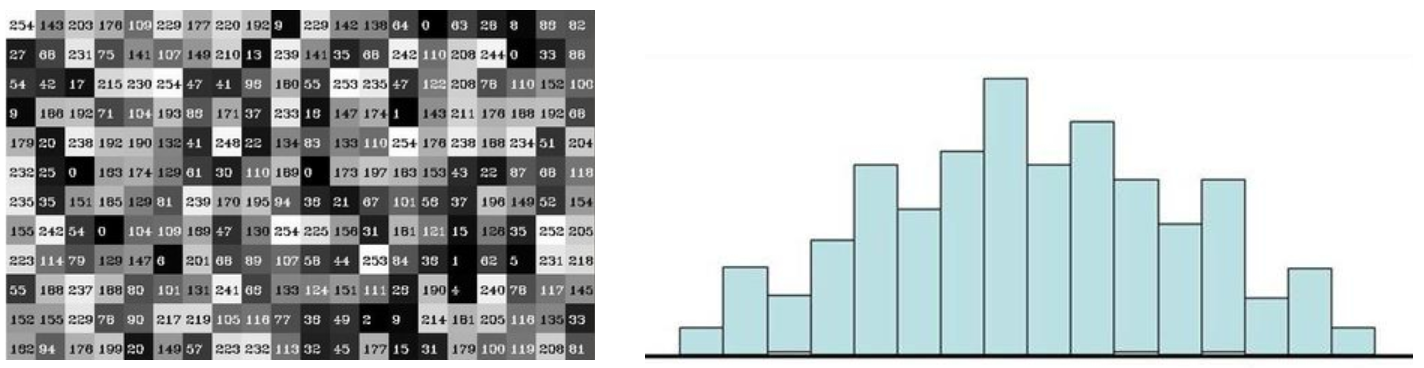

## 13.2图像直方图统计

(207000,)


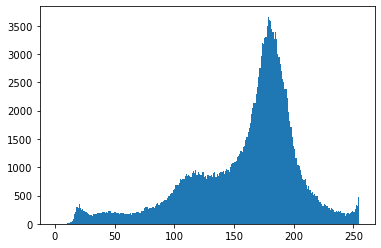

In [68]:
img = cv2.imread('Cat.jpg',0) # 0 表示灰度图
print((img.ravel()).shape)
plt.hist(img.ravel(),256) # img.ravel()将 img 拉成一维数组
plt.show()

(256, 1)
(256, 1)
(256, 1)


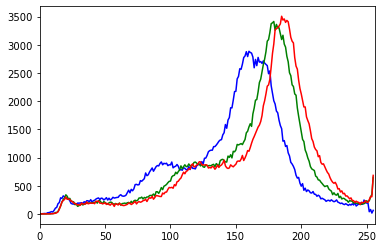

In [69]:
img = cv2.imread('Cat.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    print(histr.shape)
    plt.plot(histr,color=col)
    plt.xlim([0,256])

## 13.3图像掩码区域

In [70]:
img = cv2.imread('Cat.jpg',0)
cv_show(img,'img')
print(img.shape[:2])
mask = np.zeros(img.shape[:2],np.uint8)
print(mask.shape)
mask[100:300,100:400] = 255
cv_show(mask,'mask')
masked_img = cv2.bitwise_and(img,img,mask=mask) # 与操作
cv_show(masked_img,'masked_img')

(414, 500)
(414, 500)


## 13.4图像掩码直方图

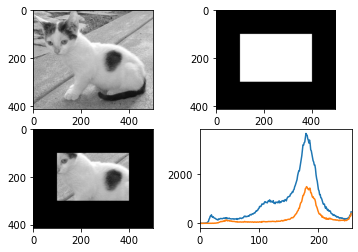

In [71]:
hist_full = cv2.calcHist([img],[0],None,[256],[0,256]) # 不带掩码统计直方图
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256]) # 带上掩码统计直方图
plt.subplot(221), plt.imshow(img,'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img,'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask) # 掩码对应的部分区域的直方图的量要小一些      
plt.xlim([0,256])
plt.show()

## 13.5直方图均衡化

① 直方图均衡化：一般可以用来提升图片的亮度。

② 直方图均衡前是一个瘦高的统计图，直方图均衡后是一个矮胖的统计图。

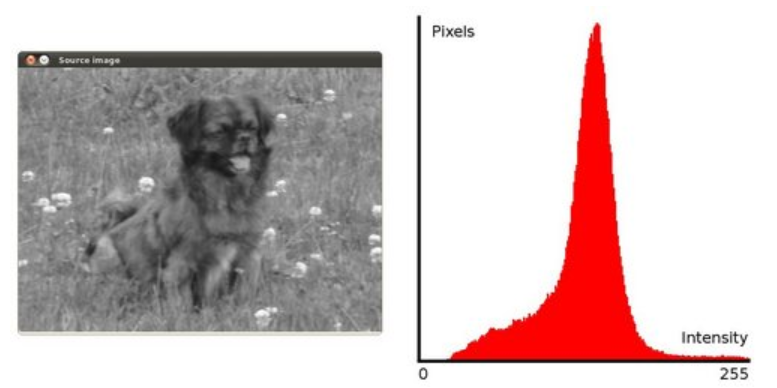

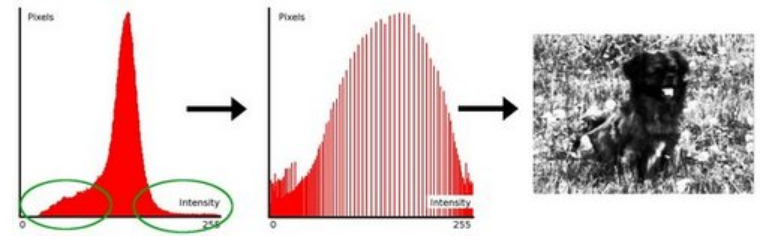

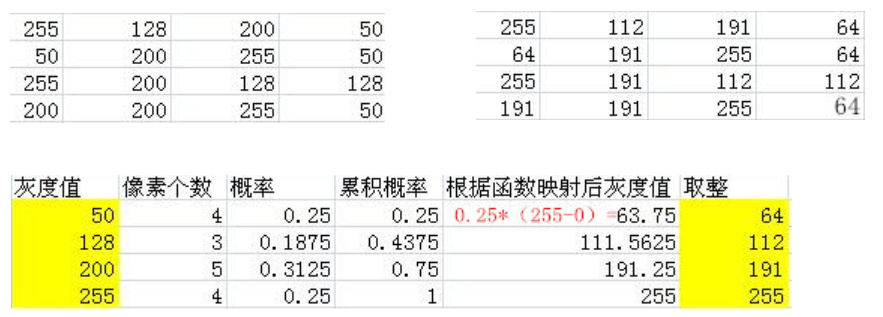

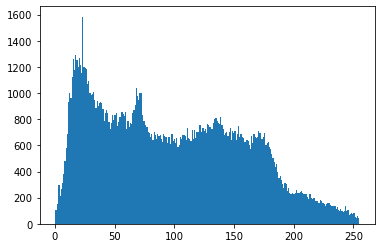

In [72]:
img = cv2.imread('Clahe.jpg',0)
plt.hist(img.ravel(),256)
plt.show()

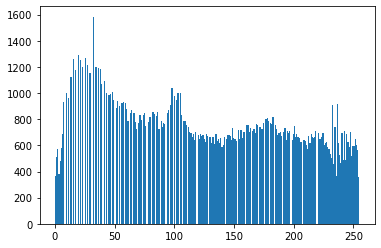

In [73]:
equ = cv2.equalizeHist(img)
plt.hist(equ.ravel(),256)
plt.show()

In [74]:
res = np.hstack((img,equ))
cv_show(res,'res')

## 13.6自适应直方图均衡化

① 如上图所示，直方图均衡化，人脸石膏本来有一些特征，可能由于直方图均衡导致丢失一些细节。所以可能切分成几个小块，局部做直方图均衡化，会比较好。

② 切分成几个小块之后，可能会导致一个现象，每个格子都会产生一个边界，opencv是对每个格子的边界进行线性插值处理。

③ 直方图均衡化函数：cv2.createCLAHE(clipLimit,tileGridSize)
 - clipLimit 颜色对比度的阈值。
 - titleGridSize 进行像素均衡化的网格大小，即在多少网格下进行直方图的均衡化操作。

In [75]:
img = cv2.imread('Clahe.jpg',0)
clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8)) # 自适应均衡化方法生成出来    
res_clahe = clahe.apply(img) # 方法应用到输入图片当中
res = np.hstack((img,equ,res_clahe))
cv_show(res,'res')

# 14.傅里叶变换

## 14.1傅里叶变化简介

我们生活在时间的世界中，早上7:00起来吃早饭，8:00去挤地铁，9:00开始上班。。。以时间为参照就是时域分析。

但是在频域中一切都是静止的！

https://zhuanlan.zhihu.com/p/19763358


## 14.2傅里叶变换的作用

① 高频：变化剧烈的灰度分量，例如边界礁石。

② 低频：变化缓慢的灰度分量，例如一片大海。

③ 高通滤波器：只保留高频，会使得图像细节增强。高频边界锐化了，增强了，细节更明显了。

④ 低通滤波器：只保留低频，会使得图像模糊。低频信息保留下来了，高频信息没了，图像边界会变得模糊了。

① opencv 中主要就是 cv2.dft() 执行傅里叶变换到频域中 和 cv2.idft() 执行逆傅里叶变换，输入图像需要先转换成 np.float32 格式。

② 得到的结果中频率为 0 的部分会在左上角，通常要转换到中心位置，可以通过 shift 变换来实现。

③ cv2.dft() 返回的结果是双通道的 ( 实部，虚部 )，通常还需要转换成图像格式才能展示(0,255)像素值。



## 14.3傅里叶变化

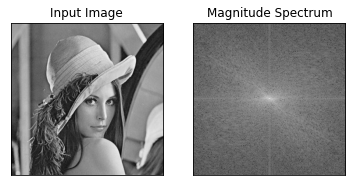

In [76]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('lena.jpg',0)

img_float32 = np.float32(img) # 输入图片转换成 np.float32 格式

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT) # 傅里叶变换
dft_shift = np.fft.fftshift(dft) # 将低频值，频率为 0 的部分转换到中间的位置
# 得到灰度图能表示的形式
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])) # 对两个通道进行转换才能得到图像形式表达，由于转换后的值为非常小的数值，因此还要转换到 0-255 之间        

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([]) # 越往中心频率越低(被 shift 拉到中间)，越往两侧频率越高
plt.show()

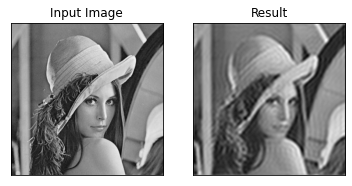

In [77]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('lena.jpg',0)

img_float32 = np.float32(img)

# DFT ( 傅里叶变换 )
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # 中心位置

# 低通滤波
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1 # 只保留中心点周围的区域，中心点为最低频的

# IDFT(傅里叶逆变换)
fshift = dft_shift*mask # 用掩码提取 dft_shift 中相应区域，是 1 就保留，不是 1 就过滤了
f_ishift = np.fft.ifftshift(fshift) # 把拉到中心位置的频谱区域给还原回去，依旧回到左上角
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1]) # 将实部和虚部结合起来，才能将傅里叶变换的结果显示出来  

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Result'), plt.xticks([]), plt.yticks([])

plt.show()                

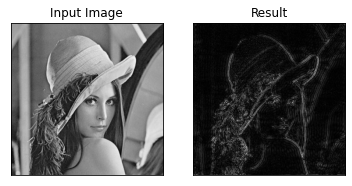

In [78]:
img = cv2.imread('lena.jpg',0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # 中心位置

# 高通滤波
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 0 # 中间区域置 0，外面的区域置 1

# IDFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Result'), plt.xticks([]), plt.yticks([])

plt.show()    